# Data Exploration

In [18]:
# import polars as pl
import pandas as pd
import ray
import modin.pandas as md
from pandarallel import pandarallel
import time
import json
import gzip

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# from thefuzz import fuzz
# from thefuzz import process
from rapidfuzz import fuzz, process, utils, string_metric

# from pycaret.classification import *

# from sklearn import metrics
# from sklearn.ensemble import ExtraTreesClassifier

In [244]:
ray.shutdown()

In [2]:
ray.init()

2022-08-20 23:08:52,465	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265


RayContext(dashboard_url='127.0.0.1:8265', python_version='3.9.12', ray_version='1.12.0', ray_commit='f18fc31c7562990955556899090f8e8656b48d2d', address_info={'node_ip_address': '127.0.0.1', 'raylet_ip_address': '127.0.0.1', 'redis_address': None, 'object_store_address': '/tmp/ray/session_2022-08-20_23-08-49_627116_22173/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-08-20_23-08-49_627116_22173/sockets/raylet', 'webui_url': '127.0.0.1:8265', 'session_dir': '/tmp/ray/session_2022-08-20_23-08-49_627116_22173', 'metrics_export_port': 64372, 'gcs_address': '127.0.0.1:58354', 'address': '127.0.0.1:58354', 'node_id': 'ab98fda64a98f513af1faafce774e27348718c3e83a6e056d621642d'})

In [14]:
%%time
# data = pl.read_parquet("../data/interim/tranco_16_05_22_10k_run_06/part_0.parquet.gzip")
# data2 = pd.read_parquet("../data/interim/tranco_16_05_22_10k_run_06/part_0.parquet.gzip")
# data2 = md.read_parquet("../data/interim/tranco_16_05_22_10k_run_06/part_0.parquet.gzip")

data = pd.read_parquet("../data/interim/part_0_dtypes.parquet.gzip")

CPU times: user 4.59 s, sys: 472 ms, total: 5.06 s
Wall time: 5.07 s


In [3]:
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [584]:
%%time
data

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


,easylist,easyprivacy,hostname,pathname,filetype,filename,protocol,query,content-type,vary,...,x-odoo-frontend,x-hello-human,x-libsyn-host,x-client-geo-latlong,x-client-geo-country,x-client-geo-city,x-client-geo-region,x-client-geo-metrocode,x-client-geo-zip,mid
0,False,False,csp.withgoogle.com,/csp/uxe-owners-acl/marketing_platform,/csp/uxe-owners-acl/marketing_platform,marketing_platform,https:,[],text/html; charset=utf-8,"sec-fetch-dest, sec-fetch-mode, sec-fetch-site",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,False,ei.phncdn.com,/www-static/js/lib/networkbar-5.0.0.js,js,networkbar-5.0.0.js,https:,"[[cache, 2022051705]]",application/javascript,accept-encoding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,False,ei.phncdn.com,/www-static/images/pornhub_logo_straight.svg,svg,pornhub_logo_straight.svg,https:,"[[cache, 2022051705]]",image/svg+xml,accept-encoding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,ei.phncdn.com,/videos/202201/09/401031701/original/(m=eafTGg...,jpg,(m=eafTGgaaaa)(mh=wv_2B3Uo7aDPa66D)9.jpg,https:,[],image/jpeg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,di.phncdn.com,/videos/202203/14/404605051/original/(m=q3WX_I...,jpg,(m=q3WX_IXbeafTGgaaaa)(mh=yFGzYLUJ7NCGW6_e)0.jpg,https:,[],image/jpeg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167553,False,False,cdnjs.cloudflare.com,/ajax/libs/angular-ui-router/0.2.10/angular-ui...,js,angular-ui-router.min.js,https:,"[[v, 14.158.0]]",application/javascript; charset=utf-8,accept-encoding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167554,False,False,www.browsealoud.com,/modules/3.6.1/136.fc673e37f3d700e1ec0d.js,js,136.fc673e37f3d700e1ec0d.js,https:,[],application/javascript,"origin,access-control-request-headers,access-c...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167555,False,True,www.googletagmanager.com,/gtag/js,/gtag/js,js,https:,"[[id, AW-627293384]]",application/javascript; charset=utf-8,accept-encoding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167556,False,False,buy.tinypass.com,/ng/common/i18n/platform-translation-map_en_US.js,js,platform-translation-map_en_US.js,https:,"[[version, 14.158.0]]",application/javascript;charset=utf-8,accept-encoding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.info(memory_usage="deep")

# 14GB -> 763MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167558 entries, 0 to 167557
Columns: 3921 entries, easylist to mid
dtypes: bool(2), category(3918), object(1)
memory usage: 763.0 MB


In [ ]:
# pycaret test
# takes too much time
# example = setup(data2, target="easyprivacy", fold_shuffle=True, session_id=123)

In [ ]:
@ray.remote
def check_col_with_category_dtype(col_name, old_memory):
    index = data2.columns.get_loc(col_name)
    if col_name in ["query"]:
        return
    print(index, col_name)
    new_memory = data2[col_name].astype("category").memory_usage(deep=True)
    if new_memory < old_memory[index + 1]:
        # data2[col_name] = data2[col_name].astype("category")
        return col_name

In [ ]:
current_memory = data.memory_usage(deep=True)

In [ ]:
%%time
category_list = ray.get(
    [check_col_with_category_dtype.remote(column, current_memory) for column in data]
)

In [ ]:
%%time
category_list = data.parallel_apply(
    lambda x: check_col_with_category_dtype(x.name, current_memory), axis=0
)

In [ ]:
category_list_final = [i for i in category_list if i is not None]
category_list_final

In [ ]:
dict_categories = {i: "category" for i in category_list_final}
dict_categories

In [ ]:
with open("dict_categories.json", "w") as f:
    json.dump(dict_categories, f)

In [613]:
with open("dict_categories.json", 'r') as categories:
    dict_categories_test = categories.read()

dict_categories = json.loads(dict_categories_test)

In [ ]:
# if "hostnaadawdme" not in dict_categories:
#     print("yes")

In [595]:
%%time
data = data.astype(dict_categories)

KeyError: "Only a column name can be used for the key in a dtype mappings argument. 'x-requester' not found in columns."

In [12]:
data.dtypes

easylist                     bool
easyprivacy                  bool
pathname                   object
filetype                   object
filename                   object
                            ...  
req-in-time                object
rsp-out-time               object
x-ccdn-expires             object
x-akamai-ssl-client-sid    object
tdm-error-code             object
Length: 3087, dtype: object

## Final approach:
#### 1. current_memory = data2.memory_usage(deep=True)
#### -- moding df --
#### 2. category_list = ray.get([test2.remote(column, current_memory) for column in data2])
#### 3. category_list_final = [i for i in category_list if i is not None]
#### 4. dict_categories = {i : 'category' for i in category_list_final}
#### 5. with open("dict_categories.json", "w") as f:
####      json.dump(dict_categories, f)
#### -- pandas df --
#### 6. data2 = data2.astype(dict_categories)

### Compress JSON Files

In [33]:
with open("../data/raw/tranco_16_05_22_10k_run_06/http/http.4.json", 'r') as raw_data:
    raw_data_test = json.loads(raw_data.read())

In [34]:
with gzip.open("../data/raw/tranco_16_05_22_10k_run_06/http/http.4.json.gzip", 'wt') as zipfile:
    json.dump(raw_data_test, zipfile)

### Exploration with New Datatypes

In [116]:
(data.isna().sum() / len(data)) >= 0.95

hostname                  False
pathname                  False
filetype                  False
filename                  False
protocol                  False
                          ...  
x-client-geo-region        True
x-client-geo-metrocode     True
x-client-geo-zip           True
mid                        True
tracker                   False
Length: 3920, dtype: bool

In [117]:
data.select_dtypes(include=["object"]).dtypes

query    object
dtype: object

### Check Tracking Classification and Create New Label Column

In [6]:
data["easylist"] = data["easylist"].astype(np.int32)
data["easyprivacy"] = data["easyprivacy"].astype(np.int32)

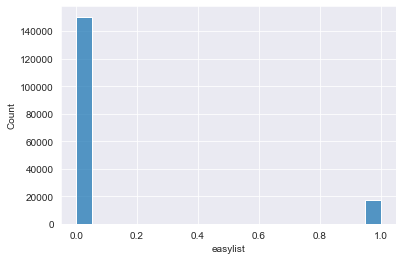

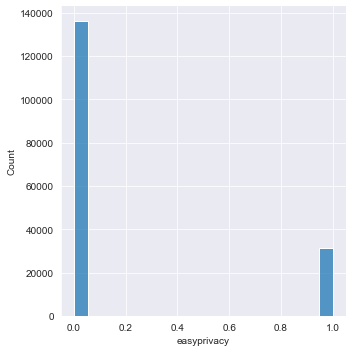

In [7]:
sns.histplot(data, x="easylist")
sns.displot(data, x="easyprivacy")

In [8]:
data["tracker"] = np.where(
    np.logical_or(data.easylist == 1, data.easyprivacy == 1), 1, 0
)
data["tracker"] = data["tracker"].astype(np.int32)

In [9]:
data.drop(["easylist", "easyprivacy"], axis=1, inplace=True)

<AxesSubplot:xlabel='tracker', ylabel='Count'>

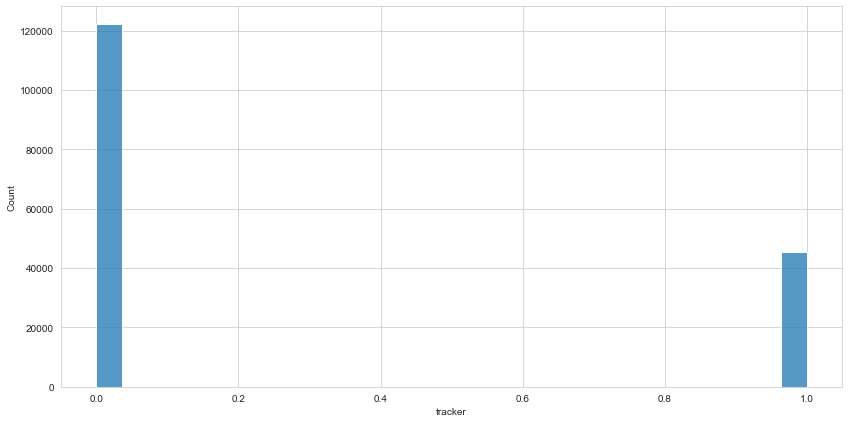

In [581]:
plt.figure(figsize=(14, 7))
sns.histplot(data, x="tracker")

### Check Column Name Similarity

In [559]:
def new_fuzzy_string_matching_for_column(col_name, col_values):
    result = pd.DataFrame(
        process.extract(
            col_name, col_values, processor=None, score_cutoff=80, limit=100
        ),
        columns=["fuzzy_match", "w_ratio", "index"],
    )
    result["col_name"] = col_name
    return result

In [560]:
%%time
data_column_values = data.columns.values[:-1].tolist()

# 19.2 s ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# match = [new_fuzzy_string_matching_for_column(col, data_column_values) for col in data_column_values]

# 10.9 s ± 218 ms per loop (mean ± std. dev. of 7 runs, 1 loop each), 16216 values
match = [
    new_fuzzy_string_matching_for_column(j, data_column_values[i + 1 :])
    for i, j in enumerate(data_column_values)
    if i != len(data_column_values) - 1
]

match2 = pd.concat(match, ignore_index=True)
print(match2)

                    fuzzy_match    w_ratio index              col_name
0                          host       90.0   244              hostname
1                x-air-hostname       90.0   593              hostname
2      x-pantheon-styx-hostname       90.0   917              hostname
3                 x-so-hostname       90.0  1474              hostname
4              x-so-lb-hostname       90.0  1475              hostname
...                         ...        ...   ...                   ...
16211                   x-bcs-o  83.333333     1                 x-bcs
16212            x-proxy-scache  92.857143     3        x-proxy-ecache
16213         x-client-geo-city  86.486486     0  x-client-geo-country
16214          x-client-geo-zip  84.848485     2     x-client-geo-city
16215          x-client-geo-zip       80.0     1   x-client-geo-region

[16216 rows x 4 columns]
CPU times: user 11.1 s, sys: 98 ms, total: 11.2 s
Wall time: 11.2 s


### Explore Distributions

Text(0.5, 1.0, 'Distribution of #NAs Across All Columns')

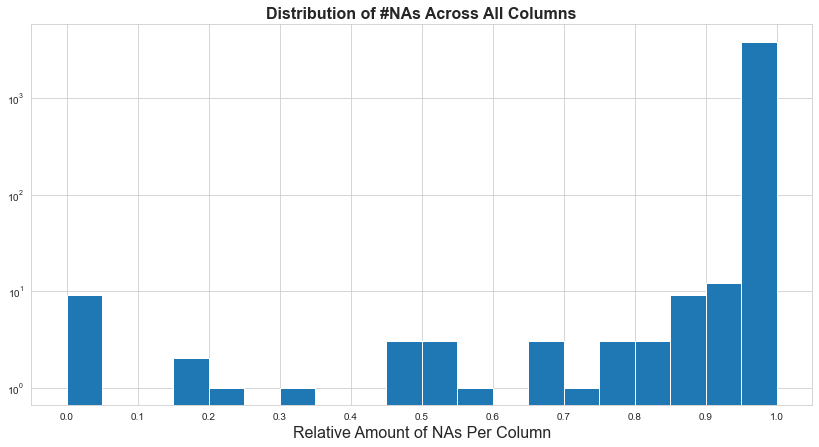

In [580]:
relative_na_per_col = pd.DataFrame((data.isna().sum() / len(data)), columns=["summary"])

plt.figure(figsize=(14, 7))
plt.hist(relative_na_per_col["summary"], log=True, bins=20)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Relative Amount of NAs Per Column", fontdict={"fontsize": 16})
plt.title("Distribution of #NAs Across All Columns", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Distribution of #Values Across All Columns')

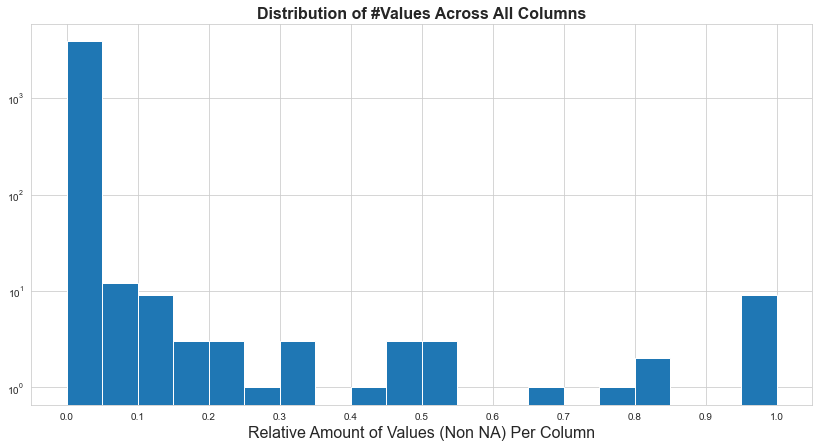

In [579]:
relative_values_per_col = pd.DataFrame((data.count() / len(data)), columns=["summary"])

plt.figure(figsize=(14, 7))
plt.hist(relative_values_per_col["summary"], log=True, bins=20)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Relative Amount of Values (Non NA) Per Column", fontdict={"fontsize": 16})
plt.title("Distribution of #Values Across All Columns", fontsize=16, fontweight="bold")

In [563]:
rel_frequency_per_col = (
    data.groupby("tracker").count() / data.groupby("tracker").count().sum()
)
rel_frequency_per_col.transpose()

tracker,0,1
hostname,0.728655,0.271345
pathname,0.728655,0.271345
filetype,0.728655,0.271345
filename,0.728655,0.271345
protocol,0.728655,0.271345
...,...,...
x-client-geo-city,1.000000,0.000000
x-client-geo-region,1.000000,0.000000
x-client-geo-metrocode,1.000000,0.000000
x-client-geo-zip,1.000000,0.000000


In [564]:
columns_with_more_trackers = rel_frequency_per_col.iloc[
    :, np.where([rel_frequency_per_col.iloc[1, :] > 0.5])[1]
].transpose()
columns_with_more_trackers["total_frequency"] = (
    data[columns_with_more_trackers.index.values].count().values
)
columns_with_more_trackers["total_nas"] = (
    data[columns_with_more_trackers.index.values].isna().sum().values
)
columns_with_more_trackers["ratio_value_total"] = columns_with_more_trackers[
    "total_frequency"
] / len(data)

columns_with_more_trackers.sort_values(by=["total_frequency"], ascending=False)

tracker,0,1,total_frequency,total_nas,ratio_value_total
alt-svc,0.487842,0.512158,37713,129845,0.225074
cross-origin-resource-policy,0.316124,0.683876,25936,141622,0.154788
access-control-allow-credentials,0.467669,0.532331,22873,144685,0.136508
pragma,0.267543,0.732457,20550,147008,0.122644
p3p,0.193632,0.806368,15483,152075,0.092404
...,...,...,...,...,...
x-marintrackerversion,0.000000,1.000000,1,167557,0.000006
tk,0.000000,1.000000,1,167557,0.000006
disposition,0.000000,1.000000,1,167557,0.000006
x-onead-guid,0.000000,1.000000,1,167557,0.000006


In [565]:
columns_with_more_non_trackers = rel_frequency_per_col.iloc[
    :, np.where([rel_frequency_per_col.iloc[0, :] > 0.5])[1]
].transpose()
columns_with_more_non_trackers["total_frequency"] = (
    data[columns_with_more_non_trackers.index.values].count().values
)
columns_with_more_non_trackers["total_nas"] = (
    data[columns_with_more_non_trackers.index.values].isna().sum().values
)
columns_with_more_non_trackers["ratio_value_total"] = columns_with_more_non_trackers[
    "total_frequency"
] / len(data)

columns_with_more_non_trackers.sort_values(by=["total_frequency"], ascending=False)

tracker,0,1,total_frequency,total_nas,ratio_value_total
hostname,0.728655,0.271345,167558,0,1.000000
protocol,0.728655,0.271345,167558,0,1.000000
query,0.728655,0.271345,167558,0,1.000000
pathname,0.728655,0.271345,167558,0,1.000000
filename,0.728655,0.271345,167558,0,1.000000
...,...,...,...,...,...
x-request-minified,1.000000,0.000000,1,167557,0.000006
x-smart-cache,1.000000,0.000000,1,167557,0.000006
x-smart-cache-id,1.000000,0.000000,1,167557,0.000006
x-smart-cache-ttl,1.000000,0.000000,1,167557,0.000006


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

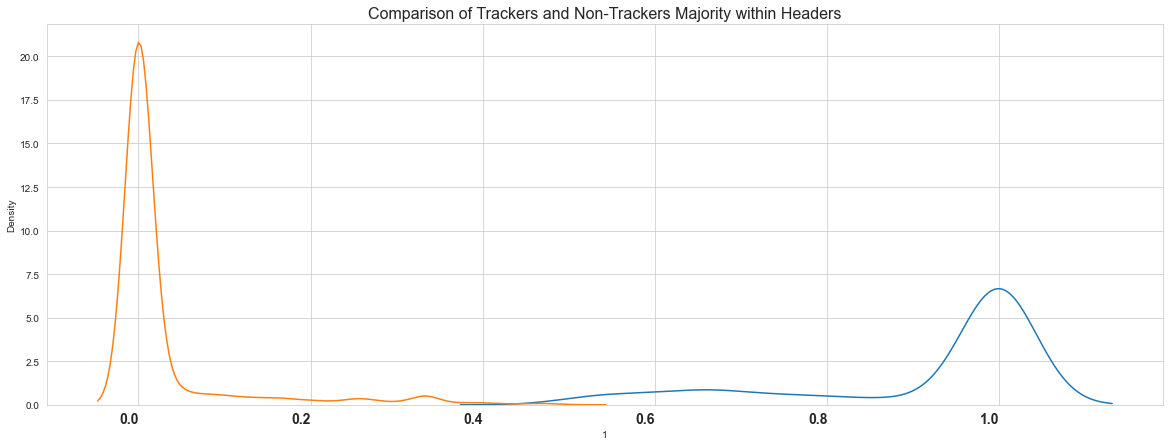

In [578]:
plt.figure(figsize=(20, 7))
sns.kdeplot(columns_with_more_trackers.iloc[:, 1])
sns.kdeplot(columns_with_more_non_trackers.iloc[:, 1])
plt.title(
    "Comparison of Trackers and Non-Trackers Majority within Headers",
    fontdict={"fontsize": 16},
)
plt.xticks(fontsize=14, fontweight="bold", ha="right")

Text(0.5, 0.98, 'Relative Frequency per Column by Tracker Classification')

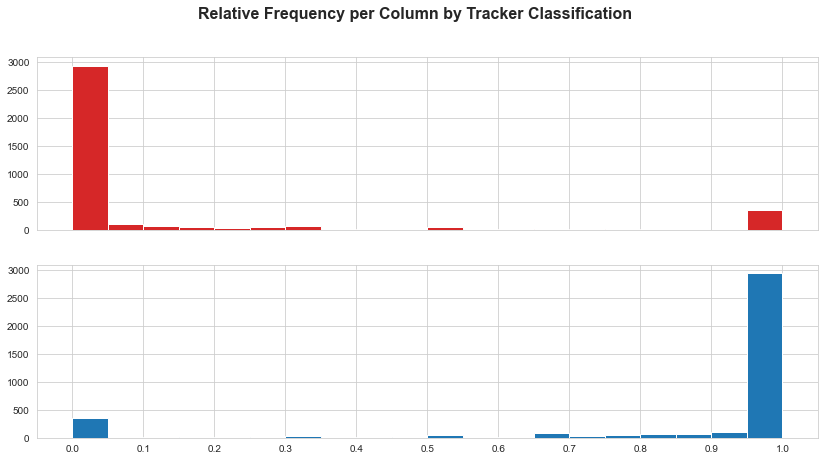

In [577]:
fig, ax = plt.subplots(2, sharex=True, figsize=(14, 7))

ax[0].hist(rel_frequency_per_col.loc[1, :], bins=20, color="tab:red")
ax[1].hist(rel_frequency_per_col.loc[0, :], bins=20)
plt.xticks(np.arange(0, 1.1, 0.1))
fig.suptitle(
    "Relative Frequency per Column by Tracker Classification",
    fontsize=16,
    fontweight="bold",
)

In [568]:
tracker_values = pd.DataFrame(rel_frequency_per_col.loc[1, :])
tracker_values = tracker_values[tracker_values[1] >= 0.95]
tracker_values.rename(columns={1: "rel_frequency"}, inplace=True)
tracker_values

,rel_frequency
google-lineitem-id,0.996198
google-creative-id,0.996198
google-mediationgroup-id,0.995261
google-mediationtag-id,0.995261
time-delta-millis,1.000000
...,...
x-bcs,1.000000
x-bc-bl,1.000000
x-bcs-o,1.000000
x-o1-bcs-ban,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

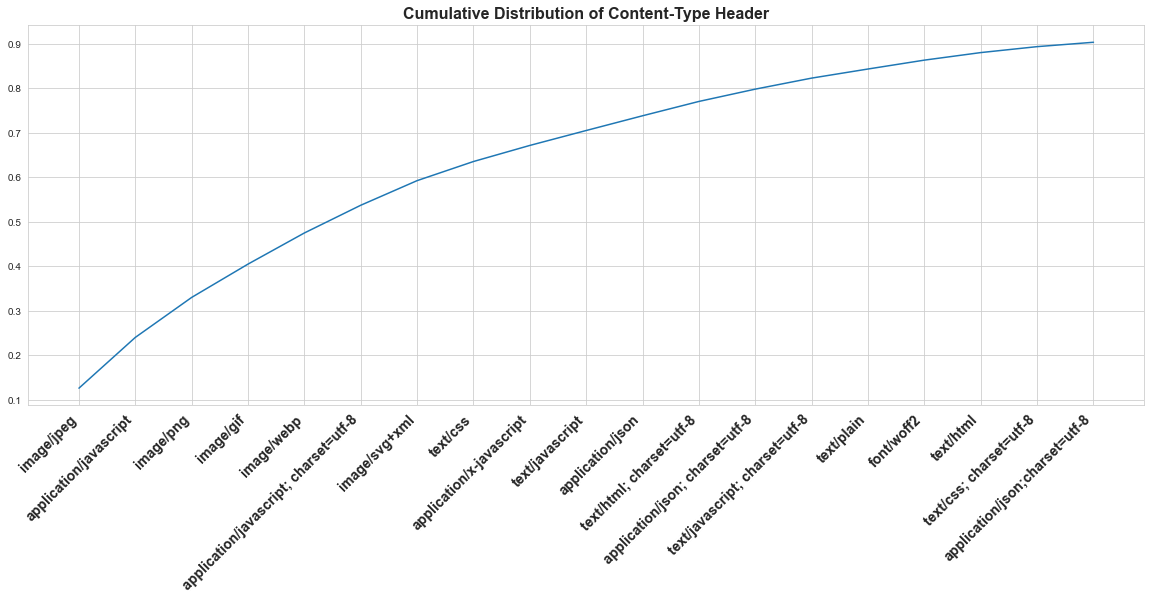

In [576]:
plt.figure(figsize=(20, 7))
plt.plot(
    (
        data["content-type"].value_counts().cumsum()
        / data["content-type"].value_counts().sum()
    )[0:19]
)
plt.title(
    "Cumulative Distribution of Content-Type Header", fontsize=16, fontweight="bold"
)
plt.xticks(rotation=45, fontsize=14, fontweight="bold", ha="right")

In [570]:
content_type = pd.DataFrame(
    data[["content-type", "tracker"]].value_counts()
).reset_index()
content_type.columns = ["content-type", "tracker", "frequency"]
content_type.sort_values(by=["frequency"], ascending=False, inplace=True)

test_values = content_type[0:34]["content-type"].values.tolist()
frequent_content_types = (
    content_type[content_type["content-type"].isin(test_values)]
    .reset_index()
    .sort_values(by="content-type")
)

non_tracker = frequent_content_types[frequent_content_types.tracker == 0]
tracker = frequent_content_types[frequent_content_types.tracker == 1]

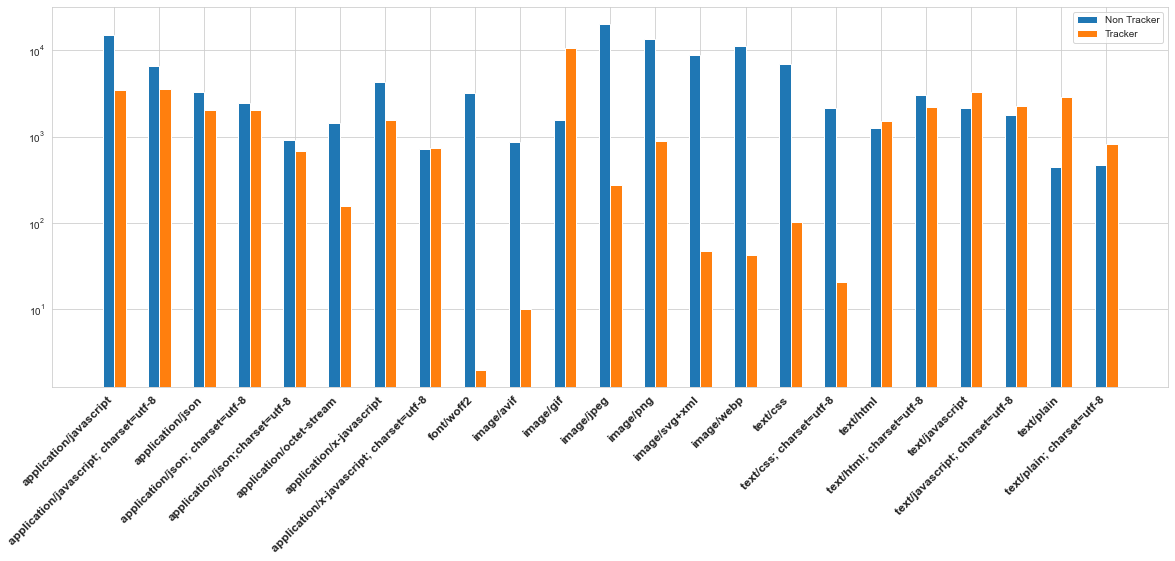

In [575]:
# sns.barplot(x='content-type', y='frequency', data = blubs, hue="tracker", log=True)
# sns.scatterplot(x="tracker", y="frequency", data = blubs, hue="tracker")
n = 23
r = np.arange(n)
width = 0.25

plt.figure(figsize=(20, 7))
plt.bar(r, non_tracker["frequency"], log=True, label="Non Tracker", width=width)
plt.bar(r + width, tracker["frequency"], log=True, label="Tracker", width=width)
plt.xticks(
    r + width / 2,
    non_tracker["content-type"].values.tolist(),
    rotation=45,
    fontsize=12,
    fontweight="bold",
    ha="right",
)
plt.legend()